Trajectory of the angry bird for the simple model.

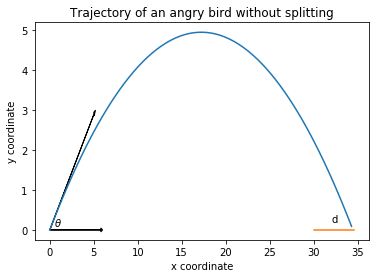

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Sep 29 09:18:23 2019

@author: Kunal Jani
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as mt

#Initializing the parameters for the projectile motion.
u=20 #Initial velocity
g=10 #Acceleration due to gravity
theta=3.14/6 #Angle of projection
t=(2*u*np.sin(theta))/g #Total time of flight in case of a perfectly parabolic trajectory
dt=0.01

time=[]
for i in range(int(t/dt)):
  time.append(dt*i)
  
x=[]
y=[]
x_init=0
y_init=0

for i in range(int(t/dt)):
    if(i==0):
      x.append(x_init)
      y.append(y_init)
    else:  
      x.append(x[i-1]+(u*np.cos(theta)*dt))
      y.append(y[i-1]+(u*np.sin(theta)-g*time[i])*dt)

plt.plot(x,y)
plt.arrow(0,0,6*np.cos(theta),6*np.sin(theta),length_includes_head=True,head_width=0.1, head_length=0.2)
plt.arrow(0,0,6,0,length_includes_head=True,head_width=0.1, head_length=0.2)
plt.text(0.5,0.1,r'$\theta$')
p1=[30,34.6]
p2=[0,0]
plt.plot(p1,p2)
plt.text(32,0.2,'d')
plt.title('Trajectory of an angry bird without splitting')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.show()

Finding the initial velocity and the angle of projection for the maximum damage using the stochastic gradient descent method.

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 11 10:48:43 2019

@author: Kunal Jani
"""
a=10.0
g=10.0

def f(u,theta):
    y=(a-(u*u*np.sin(2*theta))/g)*(a-(u*u*np.sin(2*theta))/g)
    return y
    
import numpy as np

#initializing the variables 
u=15.0
theta=3.14/6
h=0.000000001

#Vector to store the values of all the variables
w=[u,theta]
#print(w)

diff=100
eta=0.00001
while(diff>=0.0000000000001):
    grad=[]
    del1=(f(w[0]+h,w[1])-f(w[0],w[1]))/h
    del2=(f(w[0],w[1]+h)-f(w[0],w[1]))/h
    grad_L=[del1,del2]
    for i in range(len(grad_L)):
        grad.append(eta*grad_L[i])
    w_new=[]
    for i in range(len(grad_L)):
        w_new.append(w[i]-grad[i])
    diff_vector=[]
    for i in range(len(w)):
        diff_vector.append(w_new[i]-w[i])
    diff_vector_t=np.transpose(diff_vector)
    result=np.matmul(diff_vector,diff_vector_t)
    diff=result
    w=w_new
    print(diff)
print(w)    
print(f(w[0],w[1]))
#print(grad)

1.8473165444624676e-05
1.8617968833431458e-05
1.8744615699367635e-05
1.8852450063798453e-05
1.89408822553055e-05
1.9009397458744198e-05
1.9057538930460592e-05
1.9084964303047334e-05
1.9091394108672652e-05
1.9076627234653575e-05
1.9040575965804954e-05
1.8983229467591593e-05
1.8904669819731938e-05
1.8805081326731286e-05
1.8684726504334718e-05
1.8543966069752673e-05
1.8383254302084405e-05
1.8203118061549952e-05
1.8004178018421675e-05
1.778713037203249e-05
1.7552722359727214e-05
1.7301784700985416e-05
1.7035206964773358e-05
1.675392269774618e-05
1.6458930805402936e-05
1.6151238711593496e-05
1.583189613326712e-05
1.5501985057142473e-05
1.5162600371766304e-05
1.4814834724733642e-05
1.4459781123646552e-05
1.4098548971232874e-05
1.3732209527412845e-05
1.3361833002642795e-05
1.2988455228797038e-05
1.261308921405703e-05
1.2236711489302576e-05
1.186025836912767e-05
1.1484630795439593e-05
1.1110678120360134e-05
1.0739205423457516e-05
1.0370966640970885e-05
1.000667082216091e-05
9.646969486223476e-

More complex scenario where a large angry bird splits into 2 smaller angry birds.

0.92


'\n#print(time[len(x3_pos)-1]+traj_change_time)\n#print(x3_pos[len(x3_pos)-1])\n#print(x1_pos[len(x1_pos)-1])\n#print((x3_pos[len(x3_pos)-1]-10)**2+(x1_pos[len(x1_pos)-1]-20)**2)\nplt.show()\n#print(dist)\n'

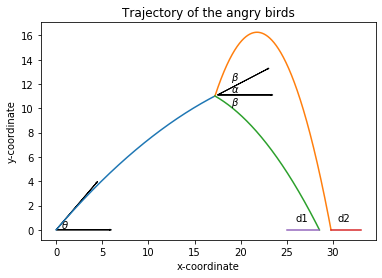

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Fri Sep 20 22:53:17 2019

@author: Kunal Jani
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as mt

#Initializing the parameters for the projectile motion.
u=25 #Initial velocity
g=10 #Acceleration due to gravity
theta=0.7248818632730731 #Angle of projection
t=(2*u*np.sin(theta))/g #Total time of flight in case of a perfectly parabolic trajectory
dt=0.001

#Storing the time for each time step.
time=[]
for i in range(2*int(t/dt)):
  time.append(dt*i)
  
x=[]
y=[]
x1=[]
y1=[]
x2=[]
y2=[]
x3=[]
y3=[]
ht=11
alpha=3.14/12 
x_init=0
y_init=0
new_time=0
flag=False
traj_change_time=0
u2=0
beta=3.14/4
current_hgt=0
for i in range(len(time)):
  #Store the values of x and y for the three new devices after the touchscreen device is tapped.
  if(current_hgt>=ht):
    if(flag==False):
      traj_change_time=time[i]
      flag=True
      hgt=u*time[i]-(g*time[i]*time[i])/2
      v=np.sqrt(u*u-2*g*hgt)
      alpha=mt.atan((y[i-1]-y[i-3])/(x[i-1]-x[i-3]))
      u2x=(v/np.sqrt(2))*np.cos(alpha)
      u2y=(v/np.sqrt(2))*np.sin(alpha)
      ##print(v)
      print(time[i])
      #print(gamma)
      #print(u2)
      #print(alpha)
      #print(theta)
    #At first time instant, we assume that the same path is still followed.
    if(new_time==0):
      x2.append(x[i-1]+(u*np.cos(theta)*dt))
      y2.append(y[i-1]+(u*np.sin(theta)-g*time[i])*dt)
      x1.append(x[i-1]+(u*np.cos(theta)*dt))
      y1.append(y[i-1]+(u*np.sin(theta)-g*time[i])*dt)
      x3.append(x[i-1]+(u*np.cos(theta)*dt))
      y3.append(y[i-1]+(u*np.sin(theta)-g*time[i])*dt)
    #Store the values after the new paths are followed.
    else:
      x2.append(x2[new_time-1]+(u*np.cos(theta)*dt))
      y2.append(y2[new_time-1]+(u*np.sin(theta)-g*time[i])*dt)
      x1.append(x1[new_time-1]+((v/np.sqrt(2))*np.cos(beta+alpha)*dt))
      y1.append(y1[new_time-1]+((v/np.sqrt(2))*np.sin(beta+alpha)-g*(time[i]-traj_change_time))*dt)
      x3.append(x3[new_time-1]+((v/np.sqrt(2))*np.cos(alpha-beta)*dt))
      y3.append(y3[new_time-1]+((v/np.sqrt(2))*np.sin(alpha-beta)-g*(time[i]-traj_change_time))*dt)
      '''
      if(y3[len(y3)-1]<0 and y3[len(y3)-1]>-1):
        print('Path 3:'+str(time[i]))
      if(y1[len(y1)-1]>0 and y3[len(y1)-1]<1):
        print('Path 1:'+str(time[i]))
       '''
    new_time=new_time+1
  #Store the values of x and y coordinates before the touchscreen device is tapped.
  else:
    if(i==0):
      x.append(x_init)
      y.append(y_init)
      current_hgt=y[i]
    else:  
      x.append(x[i-1]+(u*np.cos(theta)*dt))
      y.append(y[i-1]+(u*np.sin(theta)-g*time[i])*dt)
      current_hgt=y[i]
    #print(current_hgt)
x_pos=[]
y_pos=[]
x2_pos=[]
y2_pos=[]
x1_pos=[]
y1_pos=[]
x3_pos=[]
y3_pos=[]
#Since the time taken is long enough, only positive values of y are stored, we do not consider projectile motion under the 
#ground
tm=[]
for i in range(len(x)):
  if(y[i]>=-0.01):
    x_pos.append(x[i])
    y_pos.append(y[i])
for i in range(len(x2)):
  if(y2[i]>=-0.01):
    x2_pos.append(x2[i])
    y2_pos.append(y2[i])
for i in range(len(x1)):
  if(y1[i]>=-0.01):
    x1_pos.append(x1[i])
    y1_pos.append(y1[i])
for i in range(len(x3)):
  if(y3[i]>=-0.01):
    x3_pos.append(x3[i])
    y3_pos.append(y3[i])
#Plotting all the trajectories
plt.plot(x_pos,y_pos)
#plt.plot(x2_pos,y2_pos)
plt.plot(x1_pos,y1_pos)
plt.plot(x3_pos,y3_pos)
plt.title('Trajectory of the angry birds')
#plt.title(r'$\alpha > \beta$')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
#Showing the points of maximum damage
'''
plt.text(23,0.5,'(a,0)')
plt.text(30,0.5,'(b,0)')
plt.text(36,0.5,'(c,0)')
'''
'''
plt.scatter(25,0)
plt.scatter(32,0)
plt.scatter(38,0)
'''
plt.arrow(0,0,6*np.cos(theta),6*np.sin(theta),length_includes_head=True,head_width=0.1, head_length=0.2)
plt.arrow(0,0,6,0,length_includes_head=True,head_width=0.1, head_length=0.2)
plt.text(0.5,0.1,r'$\theta$')
plt.arrow(17.5,11.1,6*np.cos(alpha),6*np.sin(alpha),length_includes_head=True,head_width=0.1, head_length=0.2)
plt.arrow(17.5,11.1,6,0,length_includes_head=True,head_width=0.1, head_length=0.2)
#Showing the ending points of the trajectories
#arr2=[32,x2_pos[len(x2_pos)-1]]
arr1=[33,x1_pos[len(x1_pos)-1]]
arr3=[25,x3_pos[len(x3_pos)-1]]
arr4=[0,0]
dist=(32-x2_pos[len(x2_pos)-1])**2+(38-x1_pos[len(x1_pos)-1])**2+(25-x3_pos[len(x3_pos)-1])**2
#plt.plot(arr2,arr4)
plt.plot(arr1,arr4)
plt.plot(arr3,arr4)
#Showing the distances d1, d2 and d3

plt.text(26,0.7,'d1')
plt.text(30.5,0.7,'d2')
#plt.text(38.7,-0.5,'d3')
plt.text(19,11.3,r'$\alpha$')
plt.text(19,12.3,r'$\beta$')
plt.text(19,10.3,r'$\beta$')
'''
#print(time[len(x3_pos)-1]+traj_change_time)
#print(x3_pos[len(x3_pos)-1])
#print(x1_pos[len(x1_pos)-1])
#print((x3_pos[len(x3_pos)-1]-10)**2+(x1_pos[len(x1_pos)-1]-20)**2)
plt.show()
#print(dist)
'''

Finding the values of initial velocity, the angle of projection and the heigt of splitting for which the damage to cages is maximum.

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 11 10:48:43 2019

@author: Kunal Jani
"""
a=20.0
b=10.0
g=10.0
beta=3.14/4

def f(u,theta,hgt):
    v=np.sqrt(u*u-2*g*hgt)
    t=(u*np.sin(theta)-np.sqrt(u*u*np.sin(theta)*np.sin(theta)-2*g*hgt))/g
    alpha=np.arctan(np.sqrt((u*u*np.sin(theta)*np.sin(theta)-2*g*hgt)/(u*u*np.cos(theta)*np.cos(theta))))
    t1=(v*np.sin(alpha+beta))/(np.sqrt(2)*g)+(1/g)*np.sqrt((v*v*np.sin(alpha+beta)*np.sin(alpha+beta))/2+(2*g*hgt))
    t2=-(v*np.cos(alpha+beta))/(np.sqrt(2)*g)+(1/g)*np.sqrt((v*v*np.cos(alpha+beta)*np.cos(alpha+beta))/2+(2*g*hgt))
    d1=u*np.cos(theta)*t+(v/np.sqrt(2))*np.cos(alpha+beta)*t1
    d2=u*np.cos(theta)*t+(v/np.sqrt(2))*np.cos(beta-alpha)*t2
    print('Distance 1:'+str(d1))
    print('Distance 3:'+str(d2))
    y=(a-d1)*(a-d1)+(b-d2)*(b-d2)
    return y
    
import numpy as np

#initializing the variables 
u=55
theta=3.14/6
hgt=1.5
h=0.001

#Vector to store the values of all the variables
w=[u,theta,hgt]
#print(w)

diff=100
eta=0.000000001
while(diff>=0.00000000000001):
    grad=[]
    del1=(f(w[0]+h,w[1],w[2])-f(w[0],w[1],w[2]))/h
    del2=(f(w[0],w[1]+h,w[2])-f(w[0],w[1],w[2]))/h
    del3=(f(w[0],w[1],w[2]+h)-f(w[0],w[1],w[2]))/h
    grad_L=[del1,del2,del3]
    for i in range(len(grad_L)):
        grad.append(eta*grad_L[i])
    w_new=[]
    for i in range(len(grad_L)):
        w_new.append(w[i]-grad[i])
    diff_vector=[]
    for i in range(len(w)):
        diff_vector.append(w_new[i]-w[i])
    diff_vector_t=np.transpose(diff_vector)
    result=np.matmul(diff_vector,diff_vector_t)
    diff=result
    w=w_new
    print(diff)
print(w)    
print(f(w[0],w[1],w[2]))
#print(grad)

Simulation of motion in the presence of a resistive electric field.

0.92


'\n#print(time[len(x3_pos)-1]+traj_change_time)\n#print(x3_pos[len(x3_pos)-1])\n#print(x1_pos[len(x1_pos)-1])\n#print((x3_pos[len(x3_pos)-1]-10)**2+(x1_pos[len(x1_pos)-1]-20)**2)\nplt.show()\n#print(dist)\n'

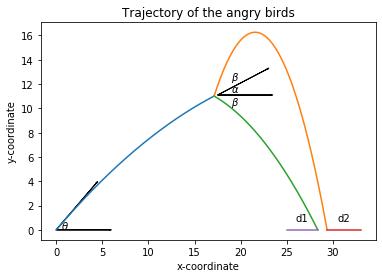

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Fri Sep 20 22:53:17 2019

@author: Kunal Jani
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as mt

#Initializing the parameters for the projectile motion.
u=25 #Initial velocity
g=10 #Acceleration due to gravity
theta=0.7248818632730731 #Angle of projection
t=(2*u*np.sin(theta))/g #Total time of flight in case of a perfectly parabolic trajectory
dt=0.001

#Storing the time for each time step.
time=[]
for i in range(2*int(t/dt)):
  time.append(dt*i)
  
x=[]
y=[]
x1=[]
y1=[]
x2=[]
y2=[]
x3=[]
y3=[]
ht=11
alpha=3.14/12 
x_init=0
y_init=0
new_time=0
flag=False
traj_change_time=0
u2=0
beta=3.14/4
current_hgt=0
accln=100

for i in range(len(time)):
  #Store the values of x and y for the three new devices after the touchscreen device is tapped.
  if(current_hgt>=ht):
    if(flag==False):
      traj_change_time=time[i]
      flag=True
      hgt=u*time[i]-(g*time[i]*time[i])/2
      v=np.sqrt(u*u-2*g*hgt)
      alpha=mt.atan((y[i-1]-y[i-3])/(x[i-1]-x[i-3]))
      u2x=(v/np.sqrt(2))*np.cos(alpha)
      u2y=(v/np.sqrt(2))*np.sin(alpha)
      ##print(v)
      print(time[i])
      #print(gamma)
      #print(u2)
      #print(alpha)
      #print(theta)
    #At first time instant, we assume that the same path is still followed.
    if(new_time==0):
      x2.append(x[i-1]+((u*np.cos(theta)-accln*dt)*dt))
      y2.append(y[i-1]+(u*np.sin(theta)-g*time[i])*dt)
      x1.append(x[i-1]+((u*np.cos(theta)-accln*dt)*dt))
      y1.append(y[i-1]+(u*np.sin(theta)-g*time[i])*dt)
      x3.append(x[i-1]+((u*np.cos(theta)-accln*dt)*dt))
      y3.append(y[i-1]+(u*np.sin(theta)-g*time[i])*dt)
    #Store the values after the new paths are followed.
    else:
      x2.append(x2[new_time-1]+((u*np.cos(theta)-accln*dt)*dt))
      y2.append(y2[new_time-1]+(u*np.sin(theta)-g*time[i])*dt)
      x1.append(x1[new_time-1]+(((v/np.sqrt(2))*np.cos(beta+alpha)-accln*dt)*dt))
      y1.append(y1[new_time-1]+((v/np.sqrt(2))*np.sin(beta+alpha)-g*(time[i]-traj_change_time))*dt)
      x3.append(x3[new_time-1]+(((v/np.sqrt(2))*np.cos(alpha-beta)-accln*dt)*dt))
      y3.append(y3[new_time-1]+((v/np.sqrt(2))*np.sin(alpha-beta)-g*(time[i]-traj_change_time))*dt)
      '''
      if(y3[len(y3)-1]<0 and y3[len(y3)-1]>-1):
        print('Path 3:'+str(time[i]))
      if(y1[len(y1)-1]>0 and y3[len(y1)-1]<1):
        print('Path 1:'+str(time[i]))
       '''
    new_time=new_time+1
  #Store the values of x and y coordinates before the touchscreen device is tapped.
  else:
    if(i==0):
      x.append(x_init)
      y.append(y_init)
      current_hgt=y[i]
    else:  
      x.append(x[i-1]+((u*np.cos(theta)-accln*dt)*dt))
      y.append(y[i-1]+(u*np.sin(theta)-g*time[i])*dt)
      current_hgt=y[i]
    #print(current_hgt)
x_pos=[]
y_pos=[]
x2_pos=[]
y2_pos=[]
x1_pos=[]
y1_pos=[]
x3_pos=[]
y3_pos=[]
#Since the time taken is long enough, only positive values of y are stored, we do not consider projectile motion under the 
#ground
tm=[]
for i in range(len(x)):
  if(y[i]>=-0.01):
    x_pos.append(x[i])
    y_pos.append(y[i])
for i in range(len(x2)):
  if(y2[i]>=-0.01):
    x2_pos.append(x2[i])
    y2_pos.append(y2[i])
for i in range(len(x1)):
  if(y1[i]>=-0.01):
    x1_pos.append(x1[i])
    y1_pos.append(y1[i])
for i in range(len(x3)):
  if(y3[i]>=-0.01):
    x3_pos.append(x3[i])
    y3_pos.append(y3[i])
#Plotting all the trajectories
plt.plot(x_pos,y_pos)
#plt.plot(x2_pos,y2_pos)
plt.plot(x1_pos,y1_pos)
plt.plot(x3_pos,y3_pos)
plt.title('Trajectory of the angry birds')
#plt.title(r'$\alpha > \beta$')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
#Showing the points of maximum damage
'''
plt.text(23,0.5,'(a,0)')
plt.text(30,0.5,'(b,0)')
plt.text(36,0.5,'(c,0)')
'''
'''
plt.scatter(25,0)
plt.scatter(32,0)
plt.scatter(38,0)
'''
plt.arrow(0,0,6*np.cos(theta),6*np.sin(theta),length_includes_head=True,head_width=0.1, head_length=0.2)
plt.arrow(0,0,6,0,length_includes_head=True,head_width=0.1, head_length=0.2)
plt.text(0.5,0.1,r'$\theta$')
plt.arrow(17.5,11.1,6*np.cos(alpha),6*np.sin(alpha),length_includes_head=True,head_width=0.1, head_length=0.2)
plt.arrow(17.5,11.1,6,0,length_includes_head=True,head_width=0.1, head_length=0.2)
#Showing the ending points of the trajectories
#arr2=[32,x2_pos[len(x2_pos)-1]]
arr1=[33,x1_pos[len(x1_pos)-1]]
arr3=[25,x3_pos[len(x3_pos)-1]]
arr4=[0,0]
dist=(32-x2_pos[len(x2_pos)-1])**2+(38-x1_pos[len(x1_pos)-1])**2+(25-x3_pos[len(x3_pos)-1])**2
#plt.plot(arr2,arr4)
plt.plot(arr1,arr4)
plt.plot(arr3,arr4)
#Showing the distances d1, d2 and d3

plt.text(26,0.7,'d1')
plt.text(30.5,0.7,'d2')
#plt.text(38.7,-0.5,'d3')
plt.text(19,11.3,r'$\alpha$')
plt.text(19,12.3,r'$\beta$')
plt.text(19,10.3,r'$\beta$')
'''
#print(time[len(x3_pos)-1]+traj_change_time)
#print(x3_pos[len(x3_pos)-1])
#print(x1_pos[len(x1_pos)-1])
#print((x3_pos[len(x3_pos)-1]-10)**2+(x1_pos[len(x1_pos)-1]-20)**2)
plt.show()
#print(dist)
'''

Using the stochastic gradient descent to solve this problem like in the previous case.

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 11 10:48:43 2019

@author: Kunal Jani
"""
a=20.0
b=10.0
g=10.0
beta=3.14/4

def f(u,theta,hgt):
    v=np.sqrt(u*u-2*g*hgt)
    accln=3
    t=(u*np.sin(theta)-np.sqrt(u*u*np.sin(theta)*np.sin(theta)-2*g*hgt))/g
    p=u*np.cos(theta)*t-(accln*t*t)/2
    alpha=np.arctan(np.sqrt((u*u*np.sin(theta)*np.sin(theta)-2*g*hgt)/(u*u*np.cos(theta)*np.cos(theta)-2*accln*p)))
    t1=(v*np.sin(alpha+beta))/(np.sqrt(2)*g)+(1/g)*np.sqrt((v*v*np.sin(alpha+beta)*np.sin(alpha+beta))/2+(2*g*hgt))
    t2=-(v*np.cos(alpha+beta))/(np.sqrt(2)*g)+(1/g)*np.sqrt((v*v*np.cos(alpha+beta)*np.cos(alpha+beta))/2+(2*g*hgt))
    d1=u*np.cos(theta)*t+(v/np.sqrt(2))*np.cos(alpha+beta)*t1-(accln*t1*t1)/2
    d2=u*np.cos(theta)*t+(v/np.sqrt(2))*np.cos(beta-alpha)*t2-(accln*t2*t2)/2
    #print('Distance 1:'+str(d1))
    #print('Distance 3:'+str(d2))
    y=(a-d1)*(a-d1)+(b-d2)*(b-d2)
    return y
    
import numpy as np

#initializing the variables 
u=55
theta=3.14/6
hgt=1.5
h=0.001

#Vector to store the values of all the variables
w=[u,theta,hgt]
#print(w)

diff=100
eta=0.000000001
while(diff>=0.000000000001):
    grad=[]
    del1=(f(w[0]+h,w[1],w[2])-f(w[0],w[1],w[2]))/h
    del2=(f(w[0],w[1]+h,w[2])-f(w[0],w[1],w[2]))/h
    del3=(f(w[0],w[1],w[2]+h)-f(w[0],w[1],w[2]))/h
    grad_L=[del1,del2,del3]
    for i in range(len(grad_L)):
        grad.append(eta*grad_L[i])
    w_new=[]
    for i in range(len(grad_L)):
        w_new.append(w[i]-grad[i])
    diff_vector=[]
    for i in range(len(w)):
        diff_vector.append(w_new[i]-w[i])
    diff_vector_t=np.transpose(diff_vector)
    result=np.matmul(diff_vector,diff_vector_t)
    diff=result
    w=w_new
    print(diff)
print(w)    
print(f(w[0],w[1],w[2]))
#print(grad)

Simulation of motion in case of oscillating gravity

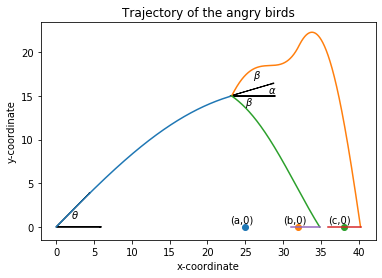

In [6]:
    #Initializing the parameters for the projectile motion.
    u=25 #Initial velocity
    g=10 #Acceleration due to gravity
    theta=0.72 #Angle of projection
    t=(2*u*np.sin(theta))/g #Total time of flight in case of a perfectly parabolic trajectory
    dt=0.001
    
    #Storing the time for each time step.
    time=[]
    for i in range(2*int(t/dt)):
      time.append(dt*i)
      
    x=[]
    y=[]
    x1=[]
    y1=[]
    x2=[]
    y2=[]
    x3=[]
    y3=[]
    ht=15
    alpha=3.14/12 
    x_init=0
    y_init=0
    new_time=0
    flag=False
    traj_change_time=0
    u2=0
    beta=3.14/4
    current_hgt=0
    accln=100
    gg=10
    
    for i in range(len(time)):
      #Store the values of x and y for the three new devices after the touchscreen device is tapped.
      g=np.abs(gg*np.sin(i*dt))
      if(current_hgt>=ht):
        if(flag==False):
          traj_change_time=time[i]
          flag=True
          hgt=u*time[i]-(g*time[i]*time[i])/2
          v=np.sqrt(u*u-2*g*hgt)
          alpha=mt.atan((y[i-1]-y[i-3])/(x[i-1]-x[i-3]))
          u2x=(v/np.sqrt(2))*np.cos(alpha)
          u2y=(v/np.sqrt(2))*np.sin(alpha)
          ##print(v)
          #print(time[i])
          #print(gamma)
          #print(u2)
          #print(alpha)
          #print(theta)
        #At first time instant, we assume that the same path is still followed.
        if(new_time==0):
          x2.append(x[i-1]+((u*np.cos(theta)-accln*dt)*dt))
          y2.append(y[i-1]+(u*np.sin(theta)-g*time[i])*dt)
          x1.append(x[i-1]+((u*np.cos(theta)-accln*dt)*dt))
          y1.append(y[i-1]+(u*np.sin(theta)-g*time[i])*dt)
          x3.append(x[i-1]+((u*np.cos(theta)-accln*dt)*dt))
          y3.append(y[i-1]+(u*np.sin(theta)-g*time[i])*dt)
        #Store the values after the new paths are followed.
        else:
          x2.append(x2[new_time-1]+((u*np.cos(theta)-accln*dt)*dt))
          y2.append(y2[new_time-1]+(u*np.sin(theta)-g*time[i])*dt)
          x1.append(x1[new_time-1]+(((v/np.sqrt(2))*np.cos(beta+alpha)-accln*dt)*dt))
          y1.append(y1[new_time-1]+((v/np.sqrt(2))*np.sin(beta+alpha)-g*(time[i]-traj_change_time))*dt)
          x3.append(x3[new_time-1]+(((v/np.sqrt(2))*np.cos(alpha-beta)-accln*dt)*dt))
          y3.append(y3[new_time-1]+((v/np.sqrt(2))*np.sin(alpha-beta)-g*(time[i]-traj_change_time))*dt)
          '''
          if(y3[len(y3)-1]<0 and y3[len(y3)-1]>-1):
            print('Path 3:'+str(time[i]))
          if(y1[len(y1)-1]>0 and y3[len(y1)-1]<1):
            print('Path 1:'+str(time[i]))
           '''
        new_time=new_time+1
      #Store the values of x and y coordinates before the touchscreen device is tapped.
      else:
        if(i==0):
          x.append(x_init)
          y.append(y_init)
          current_hgt=y[i]
        else:  
          x.append(x[i-1]+((u*np.cos(theta)-accln*dt)*dt))
          y.append(y[i-1]+(u*np.sin(theta)-g*time[i])*dt)
          current_hgt=y[i]
        #print(current_hgt)
    x_pos=[]
    y_pos=[]
    x2_pos=[]
    y2_pos=[]
    x1_pos=[]
    y1_pos=[]
    x3_pos=[]
    y3_pos=[]
    #Since the time taken is long enough, only positive values of y are stored, we do not consider projectile motion under the 
    #ground
    tm=[]
    for i in range(len(x)):
      if(y[i]>=-0.01):
        x_pos.append(x[i])
        y_pos.append(y[i])
    for i in range(len(x2)):
      if(y2[i]>=-0.01):
        x2_pos.append(x2[i])
        y2_pos.append(y2[i])
    for i in range(len(x1)):
      if(y1[i]>=-0.01):
        x1_pos.append(x1[i])
        y1_pos.append(y1[i])
    for i in range(len(x3)):
      if(y3[i]>=-0.01):
        x3_pos.append(x3[i])
        y3_pos.append(y3[i])
    
    #Plotting all the trajectories
    plt.plot(x_pos,y_pos)
    #plt.plot(x2_pos,y2_pos)
    plt.plot(x1_pos,y1_pos)
    plt.plot(x3_pos,y3_pos)
    plt.title('Trajectory of the angry birds')
    #plt.title(r'$\alpha > \beta$')
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    #Showing the points of maximum damage
    
    plt.text(23,0.5,'(a,0)')
    plt.text(30,0.5,'(b,0)')
    plt.text(36,0.5,'(c,0)')
    
    plt.scatter(25,0)
    plt.scatter(32,0)
    plt.scatter(38,0)
    
    plt.arrow(0,0,6*np.cos(theta),6*np.sin(theta),length_includes_head=True,head_width=0.1, head_length=0.2)
    plt.arrow(0,0,6,0,length_includes_head=True,head_width=0.1, head_length=0.2)
    plt.text(2,1,r'$\theta$')
    plt.arrow(23,15,6*np.cos(alpha),6*np.sin(alpha),length_includes_head=True,head_width=0.1, head_length=0.2)
    plt.arrow(23,15,6,0,length_includes_head=True,head_width=0.1, head_length=0.2)
    
    #Showing the ending points of the trajectories
    #arr2=[32,x2_pos[len(x2_pos)-1]]
    arr1=[36,x1_pos[len(x1_pos)-1]]
    arr3=[31,x3_pos[len(x3_pos)-1]]
    arr4=[0,0]
    dist=(32-x2_pos[len(x2_pos)-1])**2+(38-x1_pos[len(x1_pos)-1])**2+(25-x3_pos[len(x3_pos)-1])**2
    #plt.plot(arr2,arr4)
    
    plt.plot(arr1,arr4)
    plt.plot(arr3,arr4)
    #Showing the distances d1, d2 and d3
    
    #plt.text(37,0.7,'d1')
    #plt.text(32,0.7,'d2')
    #plt.text(38.7,-0.5,'d3')
    plt.text(28,15.3,r'$\alpha$')
    plt.text(26,17,r'$\beta$')
    plt.text(25,14,r'$\beta$')
    plt.show()

Simulation of motion is case of frictional force

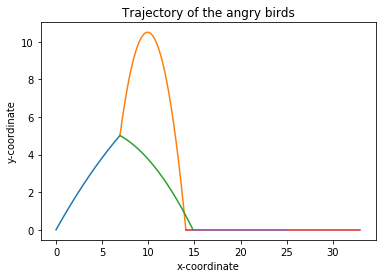

In [8]:
    #Initializing the parameters for the projectile motion.
    u=20 #Initial velocity
    g=10 #Acceleration due to gravity
    theta=0.72 #Angle of projection
    t=(2*u*np.sin(theta))/g #Total time of flight in case of a perfectly parabolic trajectory
    dt=0.001
    
    #Storing the time for each time step.
    time=[]
    for i in range(2*int(t/dt)):
      time.append(dt*i)
      
    x=[]
    y=[]
    x1=[]
    y1=[]
    x2=[]
    y2=[]
    x3=[]
    y3=[]
    ms=1000
    ht=5
    alpha=3.14/12 
    x_init=0
    y_init=0
    new_time=0
    flag=False
    traj_change_time=0
    u2=0
    beta=3.14/4
    current_hgt=0
    for i in range(len(time)):
      #Store the values of x and y for the three new devices after the touchscreen device is tapped.
      if(current_hgt>=ht):
        if(flag==False):
          traj_change_time=time[i]
          flag=True
          hgt=u*time[i]-(g*time[i]*time[i])/2
          v=np.sqrt(u*u-2*g*hgt)
          alpha=mt.atan((y[i-1]-y[i-3])/(x[i-1]-x[i-3]))
          u2x=(v/np.sqrt(2))*np.cos(alpha)
          u2y=(v/np.sqrt(2))*np.sin(alpha)
          ##print(v)
          #print(time[i])
          #print(gamma)
          #print(u2)
          #print(alpha)
          #print(theta)
        #At first time instant, we assume that the same path is still followed.
        if(new_time==0):
          vel=np.sqrt(u*u*np.cos(theta)*np.cos(theta)+(u*np.sin(theta)-g*time[i])*
                      (u*np.sin(theta)-g*time[i]))
          retarding_accln=vel/ms
          u=u-retarding_accln*dt
          x2.append(x[i-1]+((u*np.cos(theta)-retarding_accln)*dt))
          y2.append(y[i-1]+(u*np.sin(theta)-g*time[i]-retarding_accln)*dt)
          x1.append(x[i-1]+((u*np.cos(theta)-retarding_accln)*dt))
          y1.append(y[i-1]+(u*np.sin(theta)-g*time[i]-retarding_accln)*dt)
          x3.append(x[i-1]+((u*np.cos(theta)-retarding_accln)*dt))
          y3.append(y[i-1]+(u*np.sin(theta)-g*time[i]-retarding_accln)*dt)
        #Store the values after the new paths are followed.
        else:
          vel=np.sqrt(u*u*np.cos(theta)*np.cos(theta)+(u*np.sin(theta)-g*time[i])*
                      (u*np.sin(theta)-g*time[i]))
          retarding_accln=vel/ms
          u=u-retarding_accln*dt
          v=v-retarding_accln*dt
          x2.append(x2[new_time-1]+(u*np.cos(theta)*dt))
          y2.append(y2[new_time-1]+(u*np.sin(theta)-g*time[i])*dt)
          x1.append(x1[new_time-1]+((v/np.sqrt(2))*np.cos(beta+alpha)*dt))
          y1.append(y1[new_time-1]+((v/np.sqrt(2))*np.sin(beta+alpha)-g*(time[i]-traj_change_time))*dt)
          x3.append(x3[new_time-1]+((v/np.sqrt(2))*np.cos(alpha-beta)*dt))
          y3.append(y3[new_time-1]+((v/np.sqrt(2))*np.sin(alpha-beta)-g*(time[i]-traj_change_time))*dt)
          '''
          if(y3[len(y3)-1]<0 and y3[len(y3)-1]>-1):
            print('Path 3:'+str(time[i]))
          if(y1[len(y1)-1]>0 and y3[len(y1)-1]<1):
            print('Path 1:'+str(time[i]))
           '''
        new_time=new_time+1
      #Store the values of x and y coordinates before the touchscreen device is tapped.
      else:
        if(i==0):
          x.append(x_init)
          y.append(y_init)
          current_hgt=y[i]
        else:  
          vel=np.sqrt(u*u*np.cos(theta)*np.cos(theta)+(u*np.sin(theta)-g*time[i])*(u*np.sin(theta)-g*time[i]))
          retarding_accln=vel/ms
          u=u-retarding_accln*dt
          x.append(x[i-1]+((u*np.cos(theta))*dt))
          y.append(y[i-1]+(u*np.sin(theta)-g*time[i])*dt)
          current_hgt=y[i]
        #print(current_hgt)
    x_pos=[]
    y_pos=[]
    x2_pos=[]
    y2_pos=[]
    x1_pos=[]
    y1_pos=[]
    x3_pos=[]
    y3_pos=[]
    #Since the time taken is long enough, only positive values of y are stored, we do not consider projectile motion under the 
    #ground
    tm=[]
    for i in range(len(x)):
      if(y[i]>=-0.01):
        x_pos.append(x[i])
        y_pos.append(y[i])
    for i in range(len(x2)):
      if(y2[i]>=-0.01):
        x2_pos.append(x2[i])
        y2_pos.append(y2[i])
    for i in range(len(x1)):
      if(y1[i]>=-0.01):
        x1_pos.append(x1[i])
        y1_pos.append(y1[i])
    for i in range(len(x3)):
      if(y3[i]>=-0.01):
        x3_pos.append(x3[i])
        y3_pos.append(y3[i])

    #Plotting all the trajectories
    plt.plot(x_pos,y_pos)
    #plt.plot(x2_pos,y2_pos)
    plt.plot(x1_pos,y1_pos)
    plt.plot(x3_pos,y3_pos)
    plt.title('Trajectory of the angry birds')
    #plt.title(r'$\alpha > \beta$')
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')

    #Showing the points of maximum damage
    '''
    plt.text(23,0.5,'(a,0)')
    plt.text(30,0.5,'(b,0)')
    plt.text(36,0.5,'(c,0)')

    plt.scatter(25,0)
    plt.scatter(32,0)
    plt.scatter(38,0)
    '''
    '''
    plt.arrow(0,0,6*np.cos(theta),6*np.sin(theta),length_includes_head=True,head_width=0.1, head_length=0.2)
    plt.arrow(0,0,6,0,length_includes_head=True,head_width=0.1, head_length=0.2)
    plt.text(0.5,0.1,r'$\theta$')
    plt.arrow(15.2,10,6*np.cos(alpha),6*np.sin(alpha),length_includes_head=True,head_width=0.1, head_length=0.2)
    plt.arrow(15.2,10,6,0,length_includes_head=True,head_width=0.1, head_length=0.2)
    '''
    #Showing the ending points of the trajectories
    #arr2=[32,x2_pos[len(x2_pos)-1]]
    arr1=[33,x1_pos[len(x1_pos)-1]]
    arr3=[25,x3_pos[len(x3_pos)-1]]
    arr4=[0,0]
    dist=(32-x2_pos[len(x2_pos)-1])**2+(38-x1_pos[len(x1_pos)-1])**2+(25-x3_pos[len(x3_pos)-1])**2
    #plt.plot(arr2,arr4)

    plt.plot(arr1,arr4)
    plt.plot(arr3,arr4)

    #Showing the distances d1, d2 and d3

    #plt.text(24.7,0.7,'d1')
    #plt.text(28.5,0.7,'d2')
    #plt.text(38.7,-0.5,'d3')
    #plt.text(18,10.5,r'$\alpha$')
    #plt.text(18,11.8,r'$\beta$')
    #plt.text(18,9,r'$\beta$')

    #print(time[len(x3_pos)-1]+traj_change_time)
    #print(x3_pos[len(x3_pos)-1])
    #print(x1_pos[len(x1_pos)-1])
    #print((x3_pos[len(x3_pos)-1]-10)**2+(x1_pos[len(x1_pos)-1]-20)**2)

    plt.show()